In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
nas_full = pd.read_csv('../datasets/nas/nas_full.csv');

# trimming all whitespaces from cells
df_obj = nas_full.select_dtypes(['object'])
nas_full[df_obj.columns] = df_obj.apply(lambda x: x.str.strip())

nas_full.iloc[:,:]

df1 = nas_full.drop_duplicates(subset=['STUID'], keep=False)
df1 

,STUID,State,District,Gender,Age,Category,Same language,Siblings,Handicap,Father edu,...,Express science views,Watch TV,Read magazine,Read a book,Play games,Help in household,Maths %,Reading %,Science %,Social %
0,11011001001,AP,1,1,3,3,1,5,2,1,...,3,3,4,3,4,4,20.37,NaN,27.78,NaN
1,11011001002,AP,1,2,3,4,2,5,2,2,...,3,4,4,3,4,4,12.96,NaN,38.18,NaN
2,11011001003,AP,1,2,3,4,2,5,2,1,...,3,4,3,3,4,4,27.78,70.00,NaN,NaN
3,11011001004,AP,1,2,3,3,2,4,2,1,...,3,4,3,3,4,4,NaN,56.67,NaN,36.00
4,11011001005,AP,1,2,3,3,2,5,2,1,...,3,2,3,3,4,4,NaN,NaN,14.55,8.33
5,11011001006,AP,1,2,3,3,1,5,2,3,...,1,4,3,2,4,4,NaN,23.33,NaN,30.00
6,11011001007,AP,1,2,3,4,2,2,2,1,...,3,4,4,4,4,4,40.74,70.00,NaN,NaN
7,11011001008,AP,1,2,2,0,2,4,2,1,...,3,4,3,3,3,4,NaN,26.67,NaN,22.92
8,11011001009,AP,1,2,3,3,2,4,2,1,...,3,4,3,3,4,4,24.07,NaN,25.45,NaN
9,11011001010,AP,1,2,2,4,2,3,2,1,...,3,4,3,4,3,4,18.52,26.67,NaN,NaN


In [10]:
#IGNORE
len(df1[(df1['Maths %'] > 80) & (df1.Distance == 0)])

38

In [12]:
#IGNORE
df_distance_maths = pd.DataFrame(columns = ['Top', 'Mid', 'Fail']);
j=0;
for i in df1.Distance.unique():
    #Count of students with maths marks > 80 & Distance = row_num
    df_distance_maths.loc[j] = [len(df1[(df1['Maths %'] > 80) & (df1.Distance == j)]), len(df1[(df1['Maths %'] < 81) & (df1['Maths %'] > 32) & (df1.Distance == j)]), len(df1[(df1['Maths %'] < 33) & (df1.Distance == j)])] 
    j+=1;
df_distance_maths

,Top,Mid,Fail
0,38.0,920.0,1970.0
1,994.0,19828.0,35708.0
2,276.0,7169.0,12980.0
3,76.0,2415.0,5058.0
4,64.0,2256.0,4869.0


In [15]:
#IGNORE
df1.corr()
#df1.corr().to_csv('../datasets/OneLineCodeCorrelation.csv')

In [63]:
#Dividing Toppers
df_Top = df1.copy();
df_Top = df_Top.loc[df_Top['Maths %'] > 80];
corr = df_Top.corr()

#f, ax = plt.subplots(figsize=(63, 63))
#sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
#            square=True, ax=ax)

,STUID,District,Gender,Age,Category,Same language,Siblings,Handicap,Father edu,Mother edu,...,Express science views,Watch TV,Read magazine,Read a book,Play games,Help in household,Maths %,Reading %,Science %,Social %
STUID,1.000000,-0.097076,0.006432,0.012905,-0.020593,-0.161813,-0.067325,-0.002083,-0.012793,-0.026464,...,-0.032225,0.043786,-0.036859,-0.017632,0.019459,-0.142796,0.045424,0.003566,0.082015,-0.057822
District,-0.097076,1.000000,0.020739,-0.050762,-0.011575,-0.099858,0.109998,0.006692,-0.015211,-0.057492,...,-0.022829,-0.114571,0.002406,0.010106,-0.010405,0.022835,0.084953,0.007723,-0.082595,0.131000
Gender,0.006432,0.020739,1.000000,-0.059577,0.028075,-0.011248,0.056514,0.009322,0.035969,0.043294,...,-0.000729,0.003769,-0.009583,0.015336,-0.112514,0.030556,0.015604,0.024130,0.000734,0.011514
Age,0.012905,-0.050762,-0.059577,1.000000,-0.024161,0.050573,0.092306,-0.005176,-0.071026,-0.054027,...,0.004896,0.025488,-0.038998,-0.020945,-0.004255,0.046355,-0.013179,-0.030957,-0.039257,-0.051755
Category,-0.020593,-0.011575,0.028075,-0.024161,1.000000,0.027508,-0.122772,0.084074,0.142410,0.133016,...,0.059472,0.037490,0.041270,0.027691,0.037706,0.014583,-0.010356,0.110561,0.054362,0.016761
Same language,-0.161813,-0.099858,-0.011248,0.050573,0.027508,1.000000,0.114913,0.073598,0.013509,0.045727,...,0.003842,0.001202,-0.005442,-0.015784,-0.002479,0.068401,-0.009829,-0.050623,0.039891,0.042865
Siblings,-0.067325,0.109998,0.056514,0.092306,-0.122772,0.114913,1.000000,0.006137,-0.172712,-0.247403,...,-0.076754,-0.159764,-0.114083,-0.074016,-0.055792,0.092204,0.109021,-0.198360,-0.073067,0.022070
Handicap,-0.002083,0.006692,0.009322,-0.005176,0.084074,0.073598,0.006137,1.000000,0.068292,0.046934,...,0.047943,0.028465,0.024680,0.030162,0.040495,0.025423,0.015825,0.069395,0.057204,0.028717
Father edu,-0.012793,-0.015211,0.035969,-0.071026,0.142410,0.013509,-0.172712,0.068292,1.000000,0.539375,...,0.061142,0.086178,0.124428,0.063207,0.036648,0.008063,-0.010042,0.209472,0.085097,0.043646
Mother edu,-0.026464,-0.057492,0.043294,-0.054027,0.133016,0.045727,-0.247403,0.046934,0.539375,1.000000,...,0.085527,0.119893,0.153024,0.085433,0.040252,0.002899,-0.051130,0.223142,0.092763,0.030982


In [20]:
df_Top.corr().to_csv('../datasets/nas/MathsToppersCorrelation.csv')

In [48]:
#Dividing Mid
df_Mid = df1.copy();
df_Mid = df_Mid.loc[((df_Mid['Maths %'] >= 33) & (df_Mid['Maths %'] < 81))];
corr_mid = df_Mid.corr()
corr_mid
#df_Top.corr().to_csv('../datasets/nas/MathsMidCorrelation.csv')
#f, ax = plt.subplots(figsize=(63, 63))
#sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
#            square=True, ax=ax)

,STUID,District,Gender,Age,Category,Same language,Siblings,Handicap,Father edu,Mother edu,...,Express science views,Watch TV,Read magazine,Read a book,Play games,Help in household,Maths %,Reading %,Science %,Social %
STUID,1.000000,-0.097076,0.006432,0.012905,-0.020593,-0.161813,-0.067325,-0.002083,-0.012793,-0.026464,...,-0.032225,0.043786,-0.036859,-0.017632,0.019459,-0.142796,0.045424,0.003566,0.082015,-0.057822
District,-0.097076,1.000000,0.020739,-0.050762,-0.011575,-0.099858,0.109998,0.006692,-0.015211,-0.057492,...,-0.022829,-0.114571,0.002406,0.010106,-0.010405,0.022835,0.084953,0.007723,-0.082595,0.131000
Gender,0.006432,0.020739,1.000000,-0.059577,0.028075,-0.011248,0.056514,0.009322,0.035969,0.043294,...,-0.000729,0.003769,-0.009583,0.015336,-0.112514,0.030556,0.015604,0.024130,0.000734,0.011514
Age,0.012905,-0.050762,-0.059577,1.000000,-0.024161,0.050573,0.092306,-0.005176,-0.071026,-0.054027,...,0.004896,0.025488,-0.038998,-0.020945,-0.004255,0.046355,-0.013179,-0.030957,-0.039257,-0.051755
Category,-0.020593,-0.011575,0.028075,-0.024161,1.000000,0.027508,-0.122772,0.084074,0.142410,0.133016,...,0.059472,0.037490,0.041270,0.027691,0.037706,0.014583,-0.010356,0.110561,0.054362,0.016761
Same language,-0.161813,-0.099858,-0.011248,0.050573,0.027508,1.000000,0.114913,0.073598,0.013509,0.045727,...,0.003842,0.001202,-0.005442,-0.015784,-0.002479,0.068401,-0.009829,-0.050623,0.039891,0.042865
Siblings,-0.067325,0.109998,0.056514,0.092306,-0.122772,0.114913,1.000000,0.006137,-0.172712,-0.247403,...,-0.076754,-0.159764,-0.114083,-0.074016,-0.055792,0.092204,0.109021,-0.198360,-0.073067,0.022070
Handicap,-0.002083,0.006692,0.009322,-0.005176,0.084074,0.073598,0.006137,1.000000,0.068292,0.046934,...,0.047943,0.028465,0.024680,0.030162,0.040495,0.025423,0.015825,0.069395,0.057204,0.028717
Father edu,-0.012793,-0.015211,0.035969,-0.071026,0.142410,0.013509,-0.172712,0.068292,1.000000,0.539375,...,0.061142,0.086178,0.124428,0.063207,0.036648,0.008063,-0.010042,0.209472,0.085097,0.043646
Mother edu,-0.026464,-0.057492,0.043294,-0.054027,0.133016,0.045727,-0.247403,0.046934,0.539375,1.000000,...,0.085527,0.119893,0.153024,0.085433,0.040252,0.002899,-0.051130,0.223142,0.092763,0.030982


In [49]:
df1.shape[1]

64

In [56]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = corr_mid.columns
    for i in range(0, corr_mid.shape[1]-4):
        pairs_to_drop.add((cols[i]))
    return pairs_to_drop

labels_to_drop = get_redundant_pairs(corr_mid)
corr_mid = corr_mid.drop(labels=labels_to_drop)
corr_mid

,STUID,District,Gender,Age,Category,Same language,Siblings,Handicap,Father edu,Mother edu,...,Express science views,Watch TV,Read magazine,Read a book,Play games,Help in household,Maths %,Reading %,Science %,Social %
Maths %,0.045424,0.084953,0.015604,-0.013179,-0.010356,-0.009829,0.109021,0.015825,-0.010042,-0.051130,...,0.032169,-0.042521,0.009488,-0.017086,0.039390,0.056491,1.000000,0.099733,0.307315,0.355514
Reading %,0.003566,0.007723,0.024130,-0.030957,0.110561,-0.050623,-0.198360,0.069395,0.209472,0.223142,...,0.106237,0.084672,0.141861,0.094453,0.024974,0.018376,0.099733,1.000000,0.329467,0.307189
Science %,0.082015,-0.082595,0.000734,-0.039257,0.054362,0.039891,-0.073067,0.057204,0.085097,0.092763,...,0.113027,0.043633,0.072979,0.047387,0.079582,0.056729,0.307315,0.329467,1.000000,0.458004
Social %,-0.057822,0.131000,0.011514,-0.051755,0.016761,0.042865,0.022070,0.028717,0.043646,0.030982,...,0.080178,0.001625,0.060950,0.055838,0.054105,0.110393,0.355514,0.307189,0.458004,1.000000


In [64]:
corr_mid.to_csv('../datasets/nas/MathsMidCorrelation.csv')

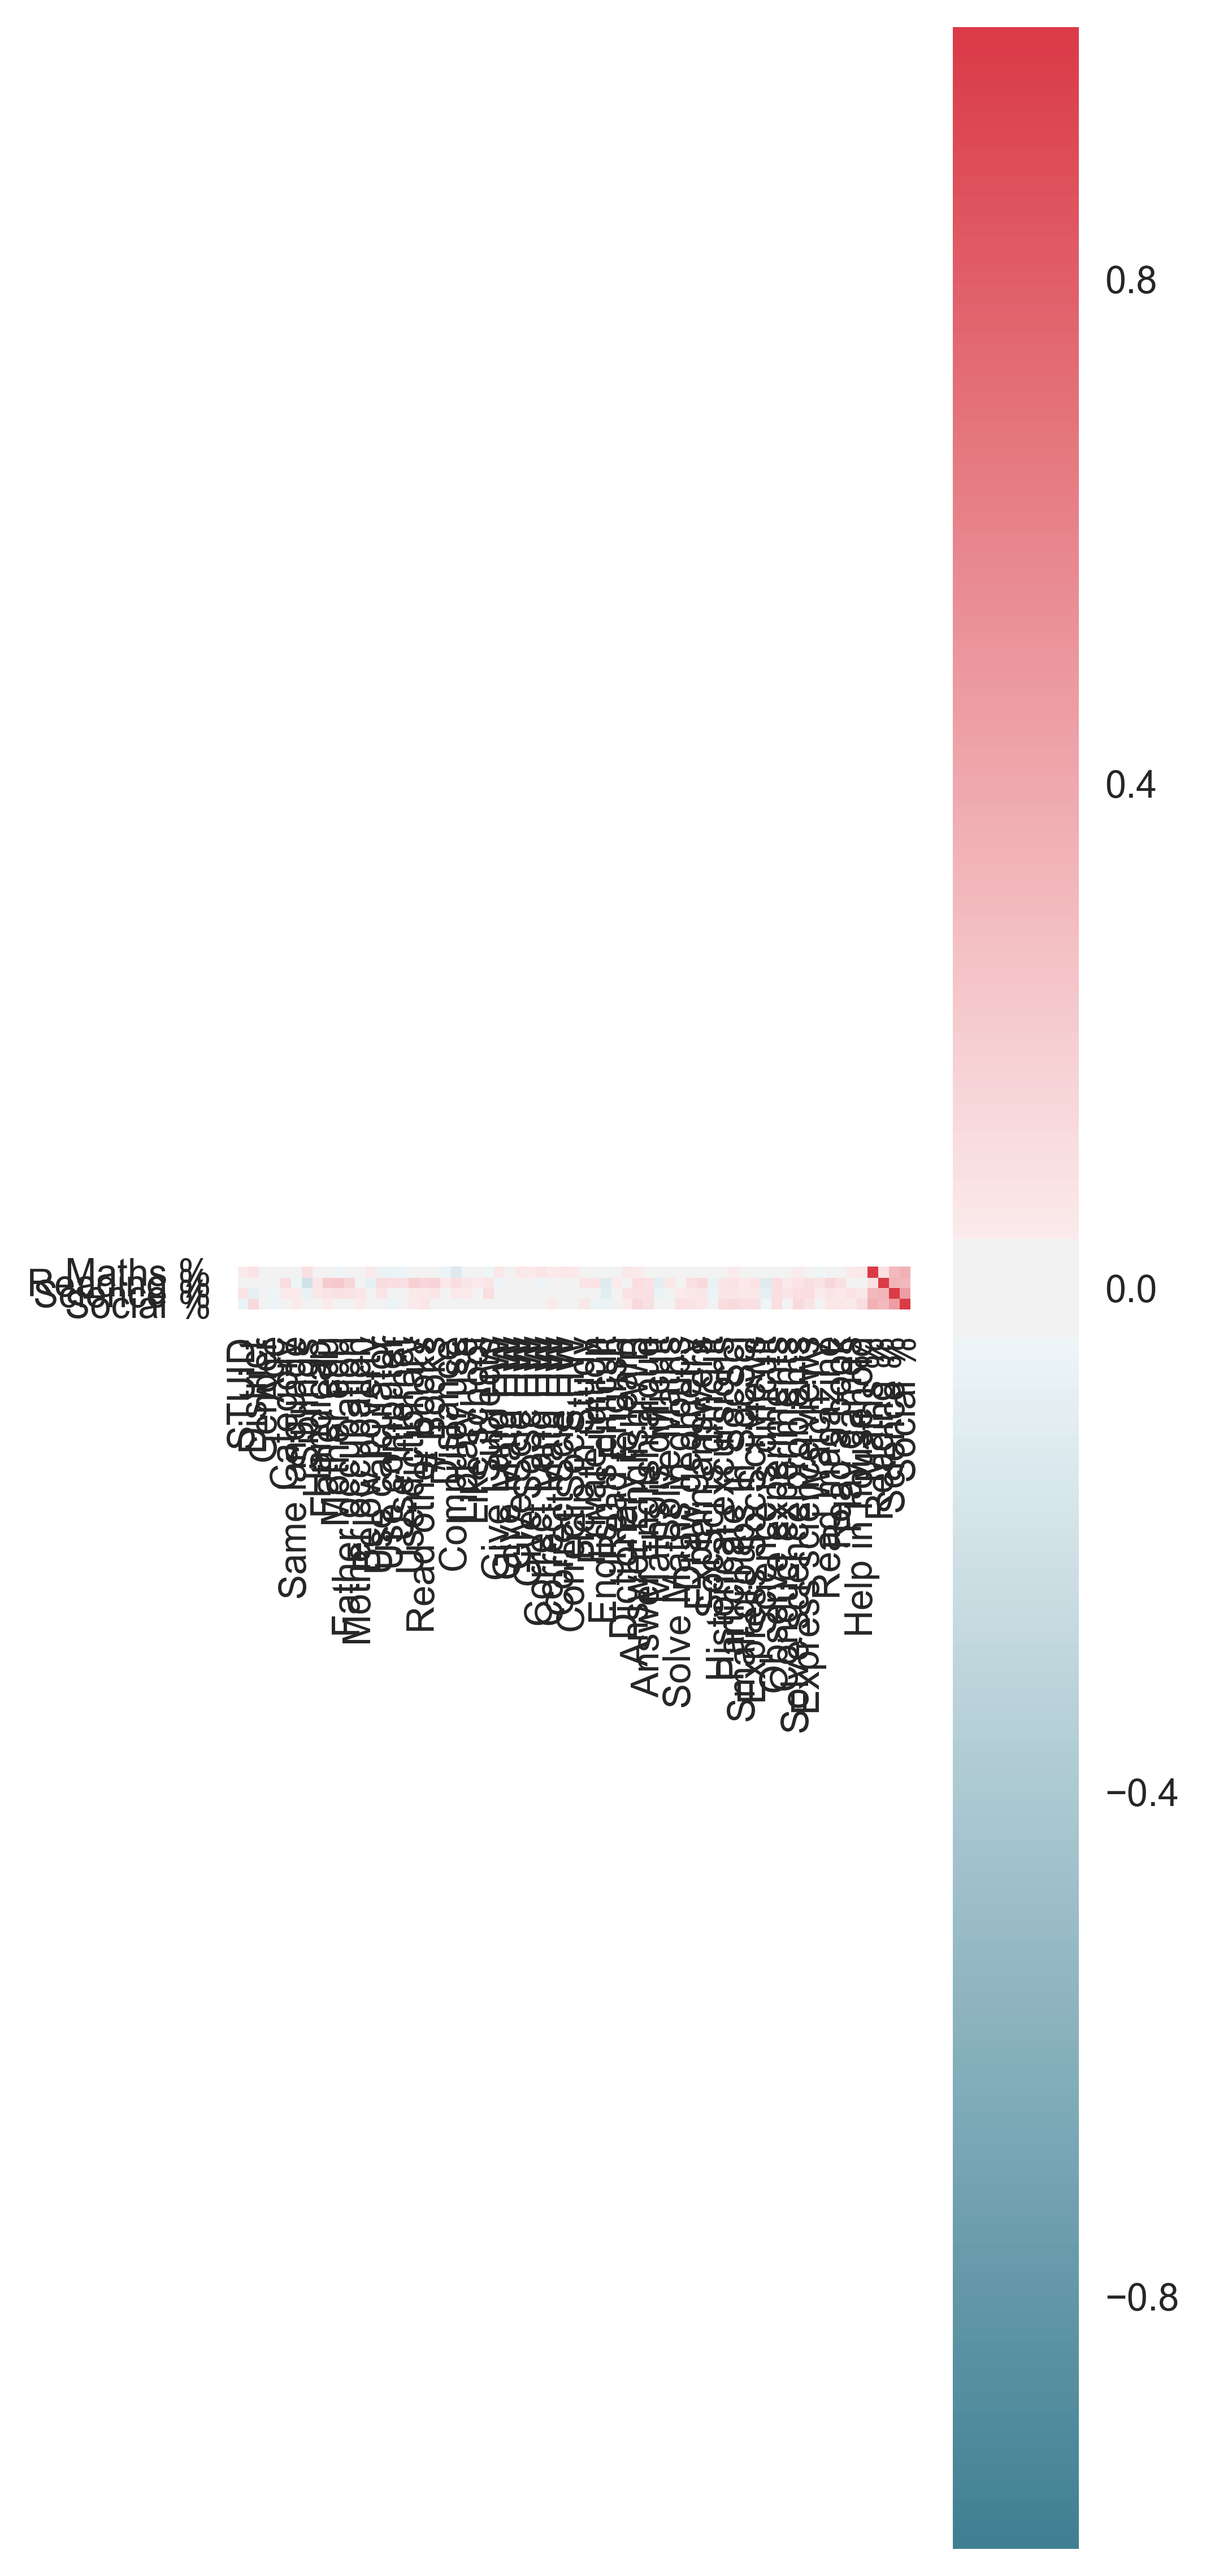

In [62]:
f, ax = plt.subplots(figsize=(4, 63),dpi=480)
sns.heatmap(corr_mid, mask=np.zeros_like(corr_mid, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
           square=True, ax=ax)

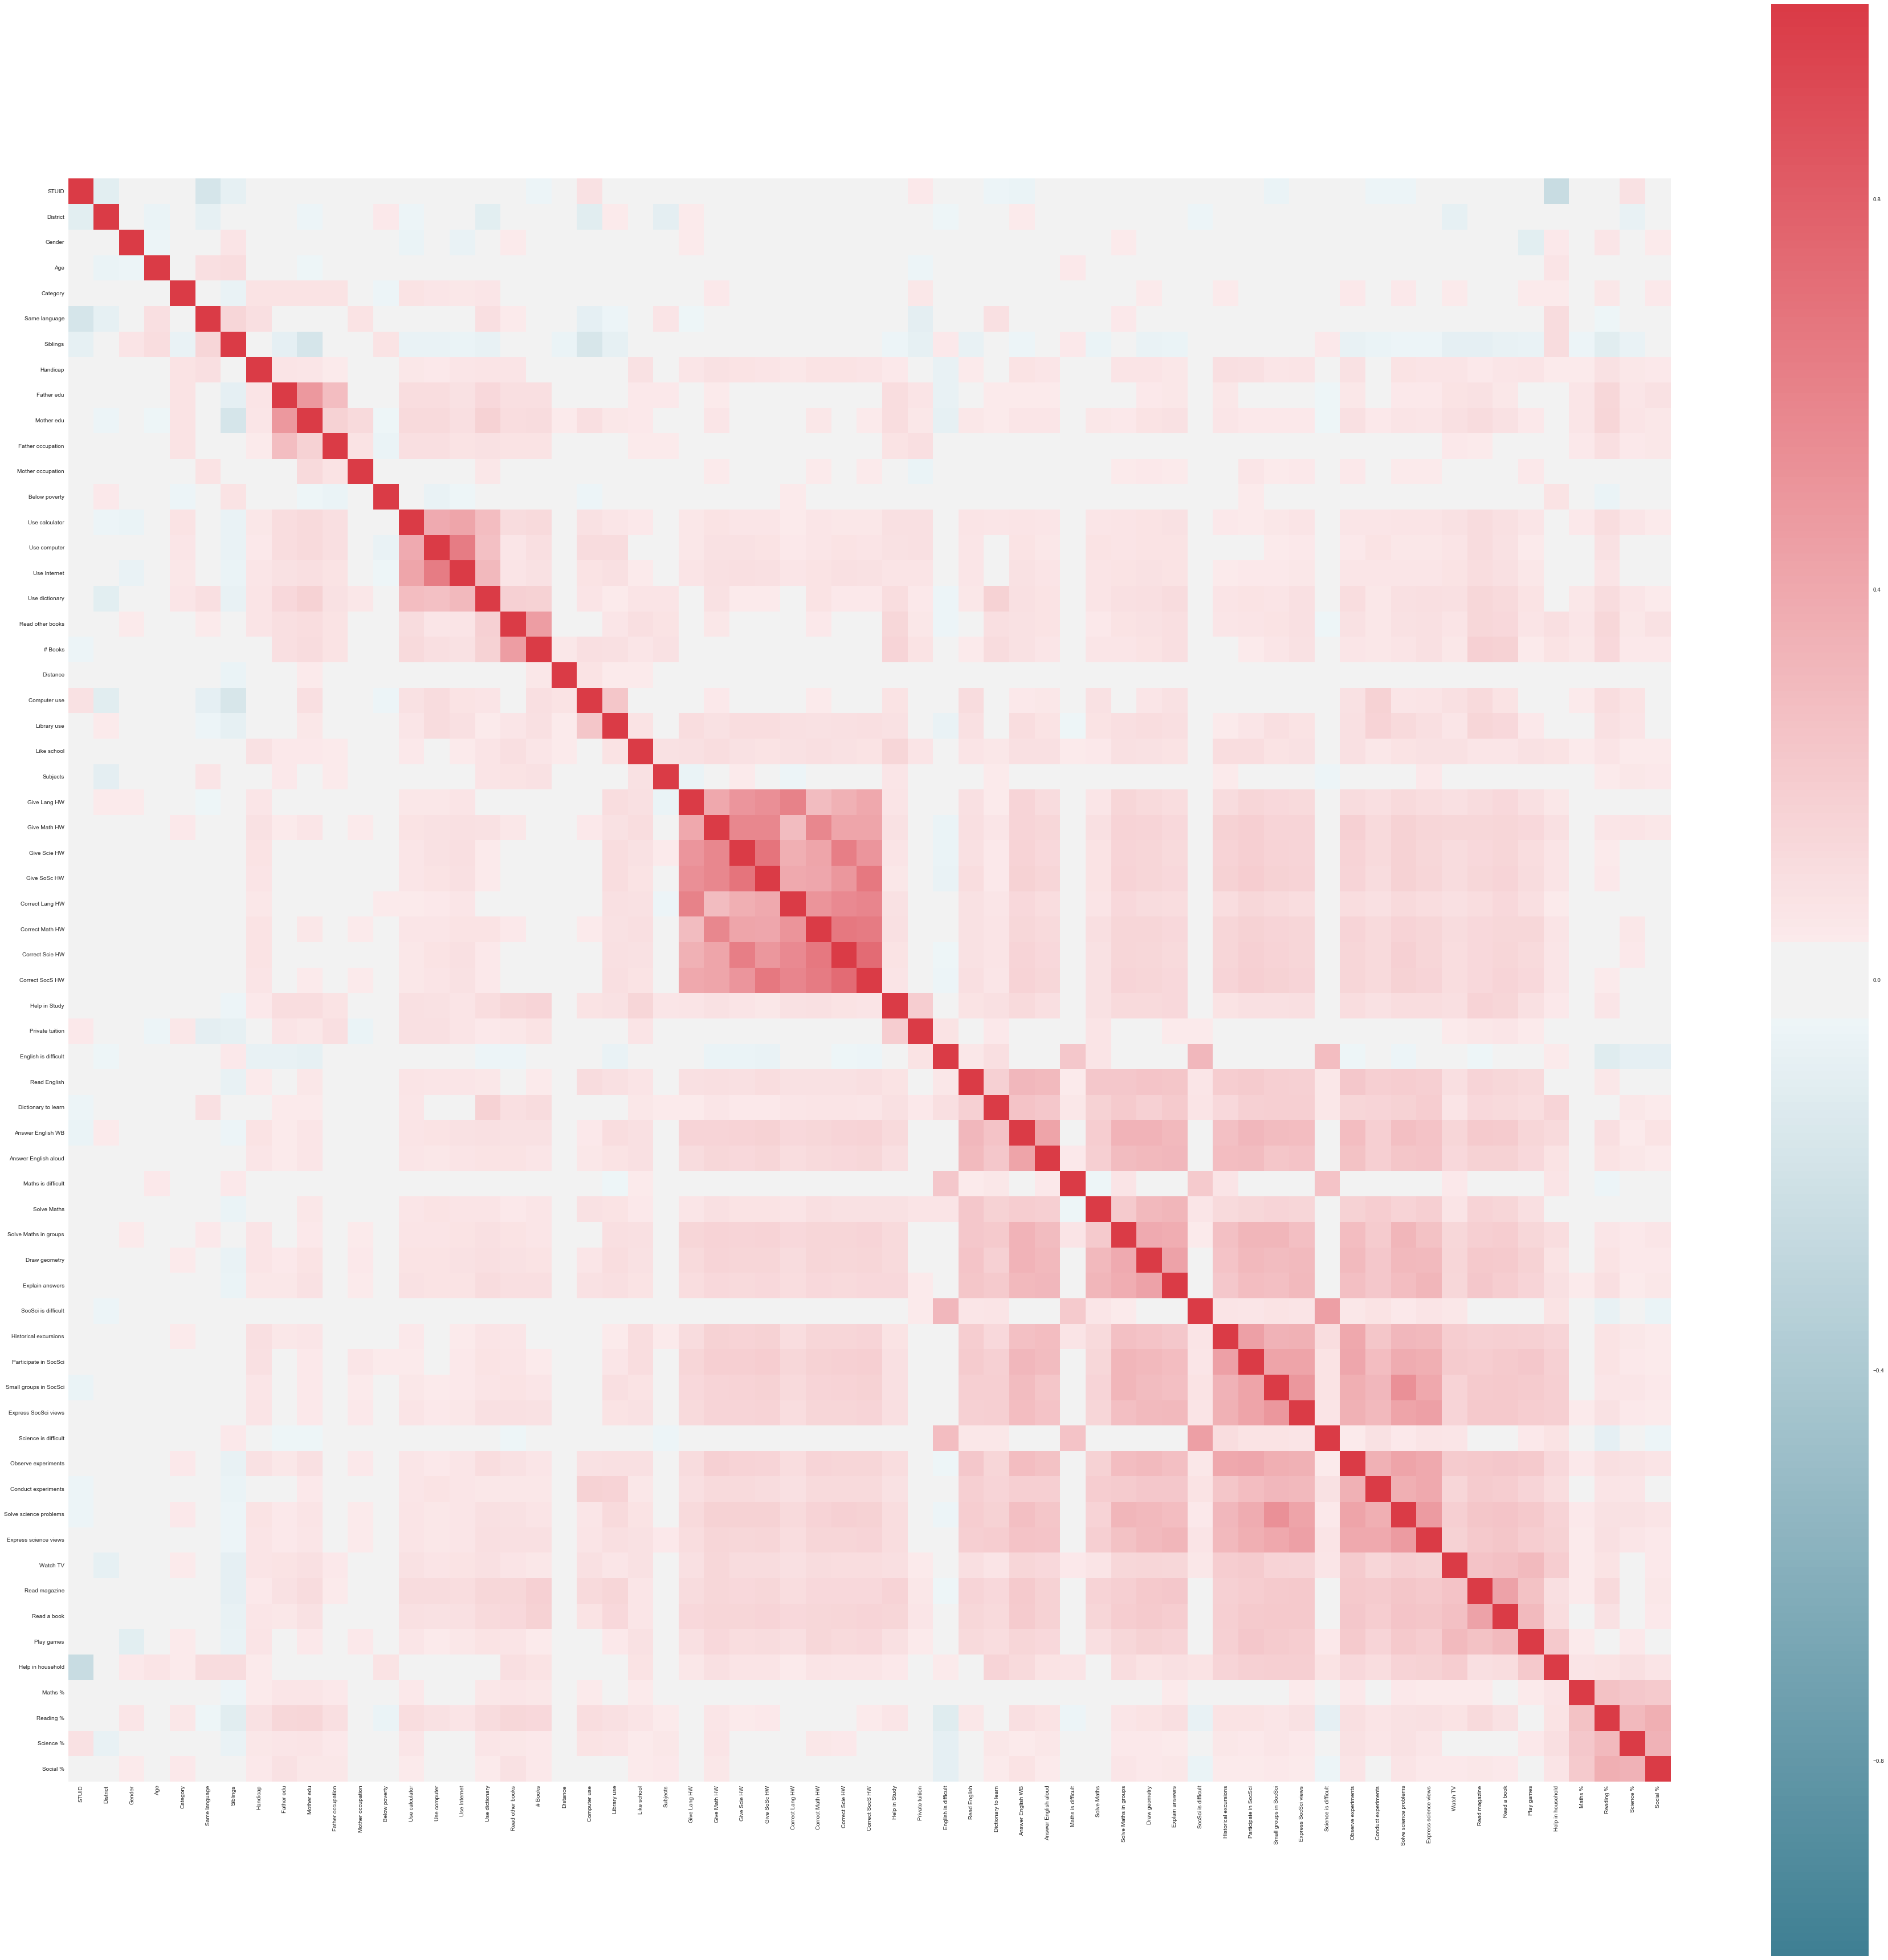

In [45]:
#Dividing Failed
df_Failed = df1.copy();
df_Failed = df_Failed.loc[df_Failed['Maths %'] < 33];
corr = df_Failed.corr();
corr
#df_Failed.corr().to_csv('../datasets/nas/MathsFailedCorrelation.csv')
# plot the heatmap
f, ax = plt.subplots(figsize=(63, 63))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [ ]:
#Dividing Top Science
df_TopS = df1.copy();
df_TopS = df_TopS.loc[df_TopS['Maths %'] > 80];
corr_topS = df_TopS.corr()
labels_to_drop = get_redundant_pairs(corr_topS)
corr_topS = corr_topS.drop(labels=labels_to_drop)
corr_topS.to_csv('../datasets/nas/SciencesTopCorrelation.csv')

#Dividing Mid
df_MidS = df1.copy();
df_MidS = df_MidS.loc[((df_MidS['Science %'] >= 33) & (df_MidS['Science %'] < 81))];
corr_midS = df_MidS.corr()
labels_to_drop = get_redundant_pairs(corr_midS)
corr_midS = corr_midS.drop(labels=labels_to_drop)
corr_midS.to_csv('../datasets/nas/SciencesMidCorrelation.csv')

#Dividing Failed
df_FailedS = df1.copy();
df_FailedS = df_FailedS.loc[df_FailedS['Maths %'] < 33];
corr_FailedS = df_FailedS.corr()
labels_to_drop = get_redundant_pairs(corr_FailedS)
corr_FailedS = corr_FailedS.drop(labels=labels_to_drop)
corr_FailedS.to_csv('../datasets/nas/SciencesFailedCorrelation.csv')

In [ ]:
#Dividing Top Social Science
df_TopO = df1.copy();
df_TopO = df_TopO.loc[df_TopO['Maths %'] > 80];
corr_TopO = df_TopO.corr()
labels_to_drop = get_redundant_pairs(corr_TopO)
corr_TopO = corr_TopO.drop(labels=labels_to_drop)
corr_TopO.to_csv('../datasets/nas/SocialTopCorrelation.csv')

#Dividing Mid
df_MidO = df1.copy();
df_MidO = df_MidO.loc[((df_MidO['Science %'] >= 33) & (df_MidO['Science %'] < 81))];
corr_MidO = df_MidO.corr()
labels_to_drop = get_redundant_pairs(corr_MidO)
corr_MidO = corr_MidO.drop(labels=labels_to_drop)
corr_MidO.to_csv('../datasets/nas/SocialMidCorrelation.csv')

#Dividing Failed
df_FailedO = df1.copy();
df_FailedO = df_FailedO.loc[df_FailedO['Maths %'] < 33];
corr_FailedO = df_FailedO.corr()
labels_to_drop = get_redundant_pairs(corr_FailedO)
corr_FailedO = corr_FailedO.drop(labels=labels_to_drop)
corr_FailedO.to_csv('../datasets/nas/SocialFailedCorrelation.csv')

In [ ]:
#Dividing Top Reading
df_TopR = df1.copy();
df_TopR = df_TopR.loc[df_TopR['Maths %'] > 80];
corr_TopR = df_TopR.corr()
labels_to_drop = get_redundant_pairs(corr_TopR)
corr_TopR = corr_TopR.drop(labels=labels_to_drop)
corr_TopR.to_csv('../datasets/nas/ReadingTopCorrelation.csv')

#Dividing Mid
df_MidR = df1.copy();
df_MidR = df_MidR.loc[((df_MidR['Science %'] >= 33) & (df_MidR['Science %'] < 81))];
corr_MidR = df_MidR.corr()
labels_to_drop = get_redundant_pairs(corr_MidR)
corr_MidR = corr_MidR.drop(labels=labels_to_drop)
corr_MidR.to_csv('../datasets/nas/ReadingMidCorrelation.csv')

#Dividing Failed
df_FailedR = df1.copy();
df_FailedR = df_FailedR.loc[df_FailedR['Maths %'] < 33];
corr_FailedR = df_FailedR.corr()
labels_to_drop = get_redundant_pairs(corr_FailedR)
corr_FailedR = corr_FailedR.drop(labels=labels_to_drop)
corr_FailedR.to_csv('../datasets/nas/ReadingFailedCorrelation.csv')